In [6]:
import os

def allaudiofiles(directory, audio_extensions=['.wav', '.mp3', '.flac', '.aac', '.ogg']):
    lista = []
    index = 0
    maxim = 2
    for root, _, files in os.walk(directory):
        if index == maxim:
            break
        for file in files:
            if index == maxim:
                break
            # Check if the file has a valid audio extension
            if any(file.lower().endswith(ext) for ext in audio_extensions):
                index = index + 1
                lista.append(os.path.join(root, file))
    return lista


directory = "um/"  # Replace with your directory path
files = ["um/5-209698-A-38.wav"]#allaudiofiles(directory)
files

['um/5-209698-A-38.wav']

In [7]:
import librosa
import numpy as np
audios = []
times = []
np.maximum
for i, file in enumerate(files):
    audio, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=audio, sr=sr) / sr
    #if i == 0:
    #    plt.plot(audio, "-", color="blue", label="reconstrcuted", lw=2)

    print("iter {} file name{}".format(i, file))
    print(audio.shape)
    print(librosa.stft(audio).shape)
    a = librosa.stft(audio)
    print(a.shape)
    audios.append(a)
    aux_time = []
    curr_time = 0
    for value in audio:
        aux_time.append(curr_time)
        curr_time = curr_time + duration
    times.append(aux_time)
audios = np.asarray(audios)
times = np.asarray(times)

iter 0 file nameum/5-209698-A-38.wav
(44100,)
(1025, 87)
(1025, 87)


In [8]:
from sklearn.decomposition import SparseCoder, DictionaryLearning
import matplotlib.pyplot as plt

alpha = 0.1
transform_alpha = alpha
dictionary = DictionaryLearning(n_components=100, random_state=7701, alpha=alpha, fit_algorithm="lars", transform_algorithm="lasso_lars", transform_alpha=transform_alpha)
dictionary.fit(np.real(audios[0]))

DictionaryLearning(alpha=0.1, n_components=100, random_state=7701,
                   transform_algorithm='lasso_lars', transform_alpha=0.1)

In [9]:
coder = SparseCoder(dictionary=dictionary.components_, transform_alpha=transform_alpha,transform_algorithm="lasso_lars")
#density = len(np.flatnonzero(x))
#x = np.ravel(np.dot(x, D_fixed))
x = coder.transform(np.real(audios[0]))
reconstructed_signal = np.dot(x, dictionary.components_)
reconstructed_audio = librosa.istft(reconstructed_signal)
do_more_than_one = False
if do_more_than_one:
    number_of_times = 2
    for i in range(number_of_times):
        x = coder.transform(reconstructed_signal)
        reconstructed_signal = np.dot(x, dictionary.components_)
        reconstructed_audio = librosa.istft(reconstructed_signal)

print(x.shape)
print(dictionary.components_.shape)
print(reconstructed_signal.shape)
print(reconstructed_audio.shape)

(1025, 100)
(100, 87)
(1025, 87)
(44032,)


(1025, 87)
(44032,)
(44032,)


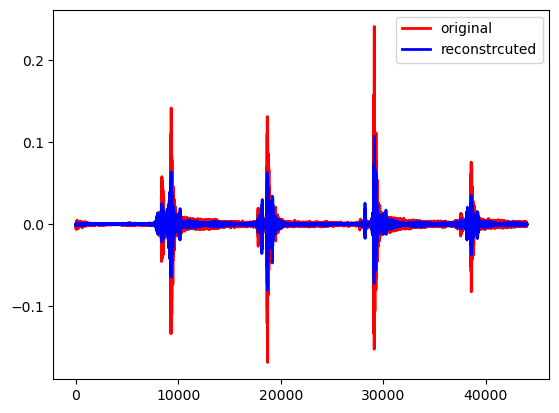

In [10]:
orig = librosa.istft(audios[0])
print(reconstructed_signal.shape)
print(reconstructed_audio.shape)
print(orig.shape)
#squared_error = np.sum(audios - x) ** 2
plt.plot(
            orig,
            "-",
            color="red",
            lw=2,
            label="original",
            #label="%s: %s nonzero coefs,\n%.2f error" % ("pff", density, squared_error),
        )
plt.plot(reconstructed_audio, "-", color="blue", label="reconstrcuted", lw=2)
plt.legend()
plt.show()

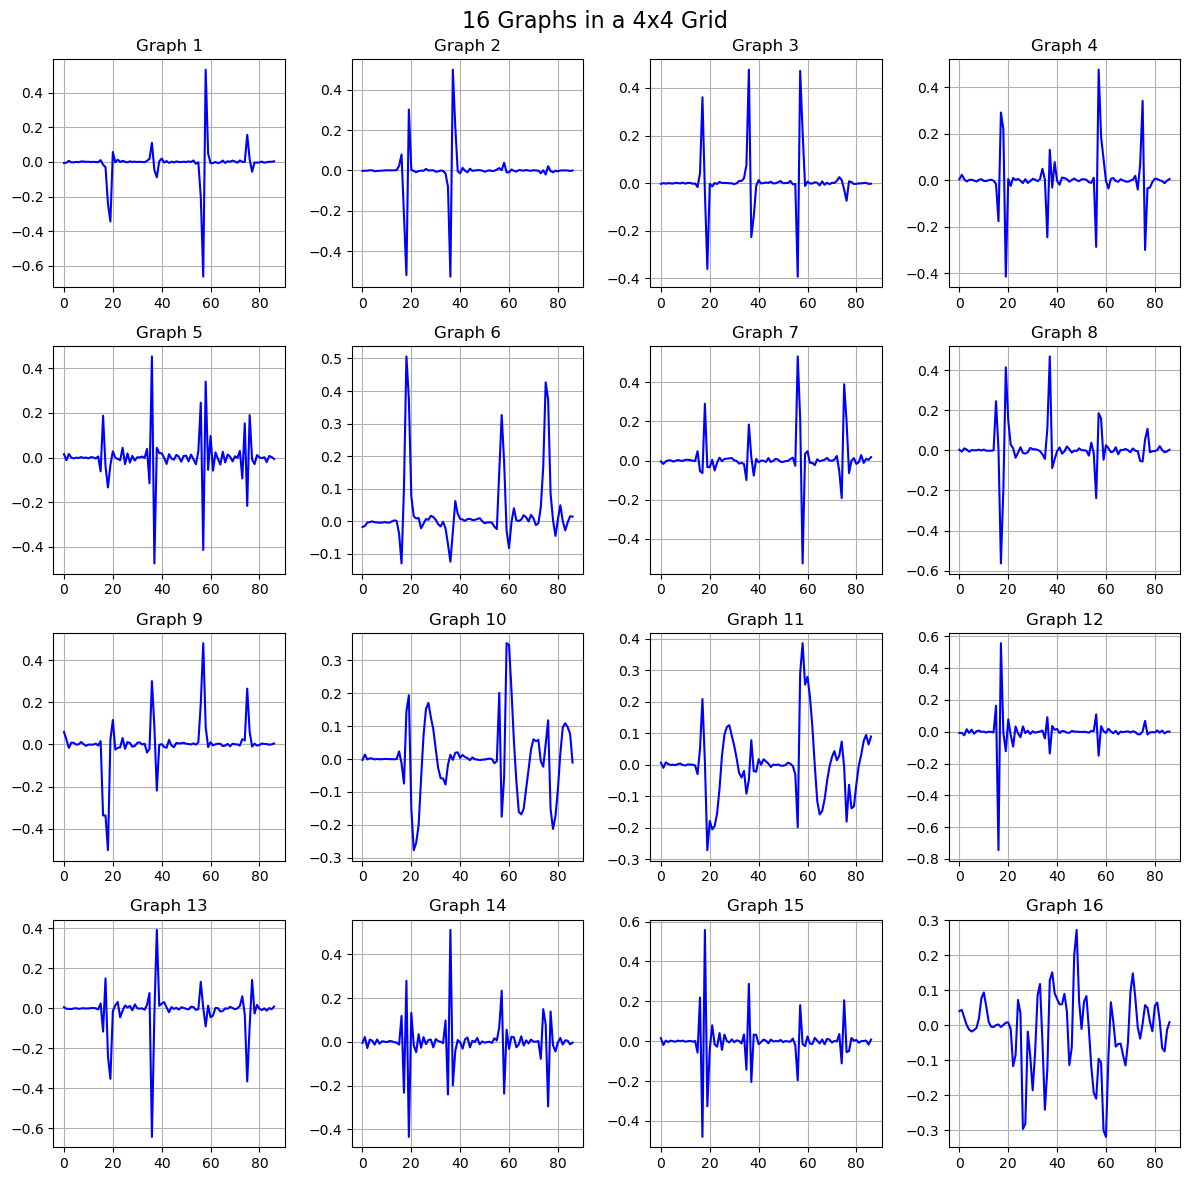

In [11]:
#plt.plot(dictionary.components_[1], "-", color="blue", label="component", lw=2)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4 rows, 4 columns
fig.suptitle('16 Graphs in a 4x4 Grid', fontsize=16)  # Main title

# Generate some data
x = np.linspace(0, 10, 100)

# Loop through each subplot and plot a graph
for i in range(4):
    for j in range(4):
        # Create a unique function for each subplot
        axes[i, j].plot(dictionary.components_[i*4+j], color='blue')  # Plot the graph
        axes[i, j].set_title(f'Graph {i*4 + j + 1}')  # Set subplot title
        axes[i, j].grid(True)  # Add grid

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [12]:
import soundfile as sf
sf.write('um/reconstructed_audio.wav', reconstructed_audio, sr)
print("{} bytes".format(os.path.getsize("um/5-209698-A-38.wav")))
print("{} bytes".format(os.path.getsize('um/reconstructed_audio.wav')))
print("{} bytes".format(os.path.getsize("um/5-209698-A-38.wav")-os.path.getsize('um/reconstructed_audio.wav')))
# could this be a valid metric????



88244 bytes
88108 bytes
136 bytes


In [13]:
from sklearn.metrics import mean_squared_error

print("MSE: {}".format(mean_squared_error(orig, reconstructed_audio)))
print("Average orig: {} \nAverage recons: {} \n\tAverage Difference: {}".format(np.average(orig), np.average(reconstructed_audio),(np.average(orig) - np.average(reconstructed_audio))))

MSE: 2.166461921916409e-05
Average orig: -1.0257382854206298e-07 
Average recons: -7.183504459003583e-09 
	Average Difference: -9.53903240830594e-08


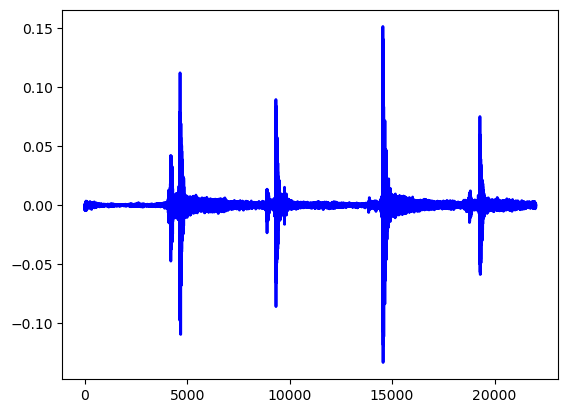

In [ ]:
#a,sr = librosa.load("um/5-209698-A-38.wav")

#plt.plot(librosa.istft(librosa.stft(a)), "-", color="blue", label="reconstrcuted", lw=2)